# 3. Napovedovanje aktivnosti struktur na naboru naključnih molekul

In [1]:
%run __A_knjiznice.py

# Import specific elements from the script
from __A_knjiznice import *
from __B_funkcije import *
import __C_konstante as kon

In [2]:
directory = '/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1/podatki_napoved'
filepath_train_data = '/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir2/molekulski_prstni_odtisi/df_circular.csv'

# Pridobitev naključnih struktur

In [3]:
import modin.pandas as pdm
df = pdm.read_csv('/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1/podatki_napoved/df_with_fingerprints.csv')

# Read the training dataset
df_train = pdm.read_csv(filepath_train_data)

# Extract SMILES strings from the training dataset
trained_smiles = set(df_train['Smiles'])


# Filter out rows that are in the training dataset
df_filtered = df[~df['Smiles'].isin(trained_smiles)]


# Calculate the count of matches excluded
matches_count = len(df) - len(df_filtered)
print(f'Number of matches excluded: {matches_count}')


# df_filtered = df_filtered.sample(n=1000000, random_state=kon.random_seed)
df_filtered

2025-01-01 12:41:55,022	INFO worker.py:1819 -- Started a local Ray instance.
(raylet) Spilled 2374 MiB, 9 objects, write throughput 891 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) Spilled 4749 MiB, 17 objects, write throughput 1186 MiB/s.
(raylet) Spilled 17976 MiB, 62 objects, write throughput 1949 MiB/s. [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(raylet) Spilled 33350 MiB, 115 objects, write throughput 2305 MiB/s.
(raylet) Spilled 66620 MiB, 401 objects, write throughput 902 MiB/s.


Number of matches excluded: 101


,Smiles,MOLPORTID,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,O=C1N(Cc2ccc(s2)S(=O)(=O)N2CCCc3ccccc23)C(=O)c...,Molport-007-763-075,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Cc1ccccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2=O)s1,Molport-007-763-076,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,COc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-077,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cc1c(Cl)cccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C...,Molport-007-763-078,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-079,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318939,Clc1ccc(cc1)-n1c(nc2n(ncc2c1=O)-c1ccccc1)-c1cccs1,Molport-002-191-019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5318940,Cc1cc(Cl)cc(Cl)c1OCC(=O)Nc1ccc(O)c(c1)-c1nc2cc...,Molport-002-191-020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5318941,CCOC(=O)C1=C(Nc2ccc(cc2)[N+]([O-])=O)S\C(=C/c2...,Molport-002-191-021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5318942,COc1ccc(cc1)-n1nc2ccc(NC(=O)Cc3ccc(Cl)cc3)cc2n1,Molport-002-191-022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(raylet) Spilled 131494 MiB, 647 objects, write throughput 669 MiB/s.


In [4]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectPercentile, chi2, VarianceThreshold
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm  # Import tqdm for progress bar

# Prepare the target variable (y) and features (X)
y = df_train['Activity'].values.ravel()  # Assuming 'Activity' is the target
X = df_train.iloc[:, 3:]  # Assuming features start from the 4th column

# Apply VarianceThreshold manually before the pipeline
variance_threshold = VarianceThreshold()  # Initialize VarianceThreshold with default threshold (0)
X_filtered = variance_threshold.fit_transform(X)  # Apply variance thresholding to the features

# SVC parameters
svc_params = {
    'C': 1.2456514582998646,
    'kernel': 'rbf',
    'gamma': 'scale'
}

# Define the pipeline steps
steps = [
    ('feature_selection', SelectPercentile(score_func=chi2, percentile=60)),  # Select top 60% of features
    ('dim_reduction', PCA(n_components=0.95, random_state=42)),  # Keep 95% explained variance
    ('classifier', SVC(probability=True, random_state=42, **svc_params))  # Apply SVC parameters
]

# Initialize the pipeline
pipeline = Pipeline(steps)

# Step 1: Train the model on the entire training dataset (after applying variance thresholding)
pipeline.fit(X_filtered, y)

# Step 2: Load the new dataset (e.g., test dataset)
df_molport = df_filtered  # Assuming df_filtered is your new dataset

# Prepare the features from the new dataset
X_molport = df_molport.iloc[:, 2:]  # Assuming the same feature structure as the training dataset

# Apply the same VarianceThreshold to the new dataset
X_molport_filtered = variance_threshold.transform(X_molport)  # Apply the variance threshold to the test data

# Step 3: Initialize tqdm to monitor predictions
# Initialize tqdm for progress bar
total_samples = len(df_molport)
progress_bar = tqdm(total=total_samples, desc="Making Predictions", unit="sample", ncols=100)

# Step 4: Make predictions and update the progress bar
y_pred = []
y_proba = []

for i, chunk in enumerate(X_molport_filtered):
    prediction = pipeline.predict([chunk])  # Predict class label for the current sample
    probability = pipeline.predict_proba([chunk])  # Predict class probabilities for the current sample

    # Append the results
    y_pred.append(prediction[0])
    y_proba.append(probability[0, 1])  # Probability of being active (class 1)

    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar when done
progress_bar.close()

# Add the predicted activity and probability of being active (1) directly to df_molport
df_molport['Predicted_Activity'] = y_pred
df_molport['Probability_Active'] = y_proba

# Display the relevant columns
result_df = df_molport[['Smiles', 'Predicted_Activity', 'Probability_Active']]

Making Predictions: 100%|██████████████████████████| 5318843/5318843 [2:31:12<00:00, 586.23sample/s]


In [5]:
result_df

,Smiles,Predicted_Activity,Probability_Active
0,O=C1N(Cc2ccc(s2)S(=O)(=O)N2CCCc3ccccc23)C(=O)c...,0,0.240408
1,Cc1ccccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2=O)s1,0,0.299703
2,COc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,0,0.284226
3,Cc1c(Cl)cccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C...,0,0.278714
4,Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,1,0.500000
...,...,...,...
5318939,Clc1ccc(cc1)-n1c(nc2n(ncc2c1=O)-c1ccccc1)-c1cccs1,0,0.087016
5318940,Cc1cc(Cl)cc(Cl)c1OCC(=O)Nc1ccc(O)c(c1)-c1nc2cc...,0,0.296806
5318941,CCOC(=O)C1=C(Nc2ccc(cc2)[N+]([O-])=O)S\C(=C/c2...,0,0.290591
5318942,COc1ccc(cc1)-n1nc2ccc(NC(=O)Cc3ccc(Cl)cc3)cc2n1,0,0.281378


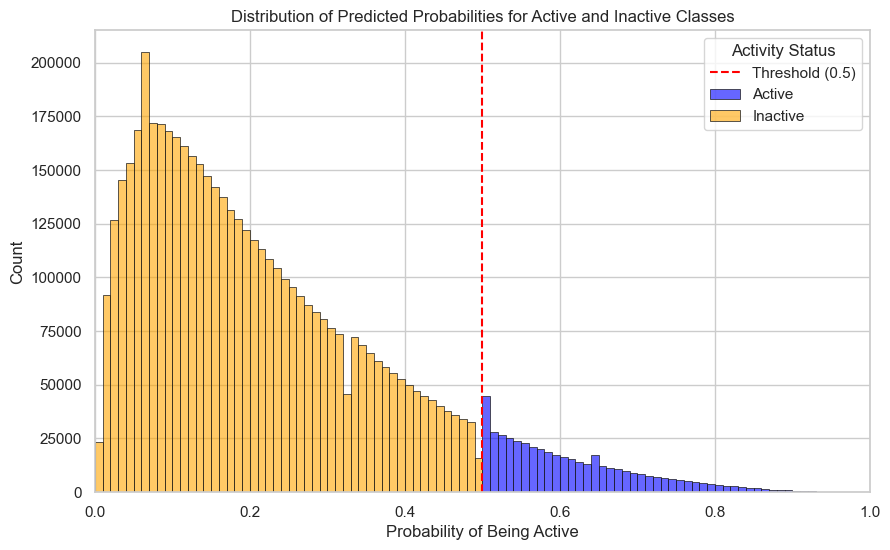

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming result_df is already defined with 'Predicted_Activity' and 'Probability_Active'

# Create a new column for the activity status based on Probability_Active
result_df['Activity_Status'] = np.where(result_df['Probability_Active'] >= 0.5, 'Active', 'Inactive')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Define bins for 1% increments from 0 to 1
bins = np.arange(0, 1.01, 0.01)  # 0 to 1 in steps of 0.01

# Create the histogram for Active substances
sns.histplot(data=result_df[result_df['Activity_Status'] == 'Active'], 
             x='Probability_Active', bins=bins, 
             color='blue', stat='count', edgecolor='k', label='Active', alpha=0.6)

# Create the histogram for Inactive substances
sns.histplot(data=result_df[result_df['Activity_Status'] == 'Inactive'], 
             x='Probability_Active', bins=bins, 
             color='orange', stat='count', edgecolor='k', label='Inactive', alpha=0.6)

# Add a vertical line at the 0.5 threshold for clarity
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')

# Add labels and title
plt.title('Distribution of Predicted Probabilities for Active and Inactive Classes')
plt.xlabel('Probability of Being Active')
plt.ylabel('Count')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.grid(True)
plt.legend(title='Activity Status')

# Show the plot
plt.show()

In [7]:
# Count the number of active predictions above specified thresholds
thresholds = [0.5, 0.75, 0.9]

# Initialize a dictionary to store counts
active_counts = {}

for threshold in thresholds:
    count_active = result_df[result_df['Probability_Active'] > threshold]['Predicted_Activity'].value_counts().get(1, 0)
    active_counts[f'Count_Active_Above_{int(threshold * 100)}%'] = count_active

# Display the counts
active_counts_df = pd.DataFrame(active_counts, index=[0])
print(active_counts_df)


the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


   Count_Active_Above_50%  Count_Active_Above_75%  Count_Active_Above_90%
0                  428122                   45144                    1909


In [8]:
# Filter for active predictions (Predicted_Activity == 1) and sort by Probability_Active in descending order
active_results = df_molport[df_molport['Predicted_Activity'] == 1].sort_values(by='Probability_Active', ascending=False)
active_results

,Smiles,MOLPORTID,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Predicted_Activity,Probability_Active
2007716,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,Molport-047-919-460,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.978715
1984032,CCn1cncc1C(=O)N1CCC(CC1)c1ccc(cn1)C(=O)Nc1ccc(...,Molport-020-291-828,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.976491
146806,CC(C)C(=O)Nc1nc2cc(NS(=O)(=O)c3ccc(cc3)C3CCCCC...,Molport-007-959-952,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.974620
2162755,Cc1c(Br)ccc(F)c1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O...,Molport-051-599-305,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.973860
407895,CC(C)c1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)...,Molport-010-672-327,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.971987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862741,CCC(C)NC(=O)c1cnn2c(cc(nc12)-c1ccc(Br)cc1)C(F)...,Molport-001-493-818,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.486340
1531328,Cc1noc(c1C)-c1cc(c(C)s1)S(=O)(=O)Nc1ccc(C)cc1Br,Molport-010-834-427,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.486339
1159858,Cn1ccnc1-c1ccccc1C(=O)N1CCCCC1CCc1ccccc1,Molport-027-831-309,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.486339
2982028,Cc1ccccc1-n1nc2CSCc2c1NC(=O)CC12CC3CC(CC(C3)C1)C2,Molport-003-054-472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.486339


In [9]:
active_results.head(100)

,Smiles,MOLPORTID,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Predicted_Activity,Probability_Active
2007716,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,Molport-047-919-460,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.978715
1984032,CCn1cncc1C(=O)N1CCC(CC1)c1ccc(cn1)C(=O)Nc1ccc(...,Molport-020-291-828,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.976491
146806,CC(C)C(=O)Nc1nc2cc(NS(=O)(=O)c3ccc(cc3)C3CCCCC...,Molport-007-959-952,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.974620
2162755,Cc1c(Br)ccc(F)c1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O...,Molport-051-599-305,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.973860
407895,CC(C)c1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)...,Molport-010-672-327,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.971987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761616,Fc1ccc(CN2CCCN(CC2)c2ccc(NC(=O)c3ccc(F)cc3F)cn...,Molport-006-593-527,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.949254
3017565,Fc1ccc(F)c(c1)S(=O)(=O)Nc1ccc2N(CCCc2c1)C(=O)C...,Molport-003-094-199,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0.949188
2164659,[O-][N+](=O)c1cc(F)cc(C(=O)Nc2ccc(cc2)C2CCN(CC...,Molport-051-601-262,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0.949167
3017857,Fc1ccc(cc1)S(=O)(=O)N1CCCc2cc(NC(=O)c3ccc(Br)c...,Molport-003-094-491,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.949011


In [10]:
most_active = active_results.iloc[:2500].copy()
most_active

,Smiles,MOLPORTID,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Predicted_Activity,Probability_Active
2007716,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,Molport-047-919-460,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.978715
1984032,CCn1cncc1C(=O)N1CCC(CC1)c1ccc(cn1)C(=O)Nc1ccc(...,Molport-020-291-828,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.976491
146806,CC(C)C(=O)Nc1nc2cc(NS(=O)(=O)c3ccc(cc3)C3CCCCC...,Molport-007-959-952,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.974620
2162755,Cc1c(Br)ccc(F)c1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O...,Molport-051-599-305,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.973860
407895,CC(C)c1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)...,Molport-010-672-327,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.971987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713772,CC(C)CC(=O)Nc1ccc(N(C)C)c(CN(CC2CC2)C(=O)c2ccc...,Molport-006-511-759,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.892130
2957480,CCOC(=O)N1CCc2c(C1)sc(NC(=O)c1ccc(cc1)S(=O)(=O...,Molport-003-026-929,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.892100
1860815,Fc1ccc(NC(=O)O\N=c2\oc3cc4OC5(CCCCC5)CCc4cc3c3...,Molport-019-830-244,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0.892090
2163866,COc1cc(F)c(C(=O)N2CCC(CC2)c2ccc(NC(=O)c3ccc(cc...,Molport-051-600-435,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.892081


In [11]:
from rdkit import Chem
from rdkit.Chem import FilterCatalog

def is_pains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    # Initialize PAINS filter catalog
    params = FilterCatalogParams()
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_A)
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_B)
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_C)
    catalog = FilterCatalog.FilterCatalog(params)
    
    # Check for PAINS
    entry = catalog.GetFirstMatch(mol)
    return 1 if entry is not None else 0

# Apply the PAINS filter function to the 'Smiles' column
most_active['is_pains'] = most_active['Smiles'].apply(is_pains)

# Filter out PAINS molecules
df_filtered_1 = most_active[most_active['is_pains'] == 0].drop(columns=['is_pains'])

most_active_filtered = df_filtered_1[['Smiles', 'MOLPORTID', 'Predicted_Activity', 'Probability_Active']].copy()
most_active_filtered

,Smiles,MOLPORTID,Predicted_Activity,Probability_Active
2007716,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,Molport-047-919-460,1,0.978715
1984032,CCn1cncc1C(=O)N1CCC(CC1)c1ccc(cn1)C(=O)Nc1ccc(...,Molport-020-291-828,1,0.976491
146806,CC(C)C(=O)Nc1nc2cc(NS(=O)(=O)c3ccc(cc3)C3CCCCC...,Molport-007-959-952,1,0.974620
2162755,Cc1c(Br)ccc(F)c1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O...,Molport-051-599-305,1,0.973860
407895,CC(C)c1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)...,Molport-010-672-327,1,0.971987
...,...,...,...,...
3996520,CC(C)CS(=O)(=O)N1CC2(CCN(CC(=O)Nc3ccc(C)c(F)c3...,Molport-047-020-994,1,0.892161
2957480,CCOC(=O)N1CCc2c(C1)sc(NC(=O)c1ccc(cc1)S(=O)(=O...,Molport-003-026-929,1,0.892100
1860815,Fc1ccc(NC(=O)O\N=c2\oc3cc4OC5(CCCCC5)CCc4cc3c3...,Molport-019-830-244,1,0.892090
2163866,COc1cc(F)c(C(=O)N2CCC(CC2)c2ccc(NC(=O)c3ccc(cc...,Molport-051-600-435,1,0.892081


Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


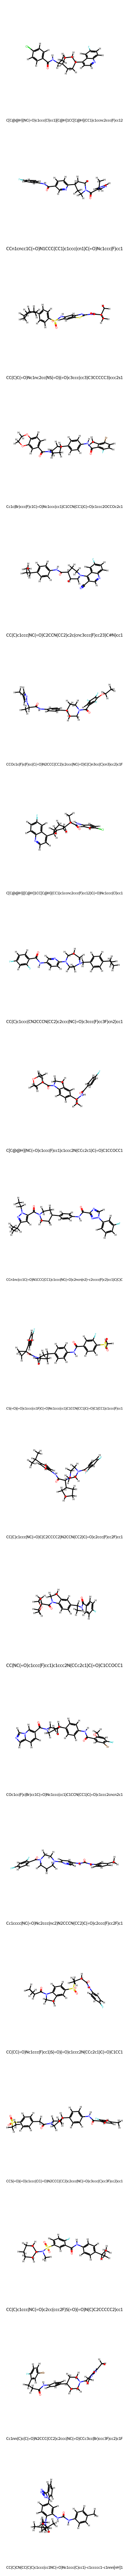

In [12]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Select the first five SMILES and convert to a list
smiles_list = most_active_filtered['Smiles'].head(20).tolist()

# Convert SMILES to RDKit Mol objects and generate 3D structures
molecules = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Add hydrogens
        mol = Chem.AddHs(mol)
        # Generate 3D coordinates
        AllChem.EmbedMolecule(mol, randomSeed=0xf00d)
        AllChem.UFFOptimizeMolecule(mol)
        molecules.append(mol)

# Draw the molecules with SMILES as labels in separate rows
img = Draw.MolsToGridImage(molecules, molsPerRow=1, subImgSize=(300, 300), legends=smiles_list)

# Display the image
img

In [13]:
# Print out the first 20 SMILES
print("First 20 SMILES:")
for smiles in smiles_list:
    print(smiles)

First 20 SMILES:
C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12
CCn1cncc1C(=O)N1CCC(CC1)c1ccc(cn1)C(=O)Nc1ccc(F)cc1
CC(C)C(=O)Nc1nc2cc(NS(=O)(=O)c3ccc(cc3)C3CCCCC3)ccc2s1
Cc1c(Br)ccc(F)c1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O)c1ccc2OCCOc2c1
CC(C)c1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)C#N)cc1
CCOc1c(F)c(F)cc(C(=O)N2CCC(CC2)c2ccc(NC(=O)C(C)n3cc(C)cn3)cc2)c1F
C[C@@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=O)Nc1ccc(Cl)cc1
CC(C)c1ccc(CN2CCCN(CC2)c2ccc(NC(=O)c3ccc(F)cc3F)cn2)cc1
C[C@@H](NC(=O)c1ccc(F)cc1)c1ccc2N(CCc2c1)C(=O)C1CCOCC1
CCn1nc(cc1C(=O)N1CCC(CC1)c1ccc(NC(=O)c2ncn(n2)-c2cccc(F)c2)cc1)C(C)C
CS(=O)(=O)c1ccc(cc1F)C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O)C1(CC1)c1ccc(F)cc1
CC(C)c1ccc(NC(=O)C(C2CCCC2)N2CCN(CC2)C(=O)c2ccc(F)cc2F)cc1
CC(NC(=O)c1ccc(F)cc1)c1ccc2N(CCc2c1)C(=O)C1CCOCC1
COc1cc(F)c(Br)cc1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O)c1ccc2cncn2c1
Cc1cccc(NC(=O)Nc2ccc(nc2)N2CCCN(CC2)C(=O)c2ccc(F)cc2F)c1
CC(CC(=O)Nc1ccc(F)cc1)S(=O)(=O)c1ccc2N(CCc2c1)C(=O)C1CC1
CCS(=O)(=O)c1ccc(CC(=O)N2CCC(CC2

In [14]:
df_filtered_1.to_csv('/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir2/podatki_napoved/most_active_filtered_svm.csv', index=False)